0.8636363636363636


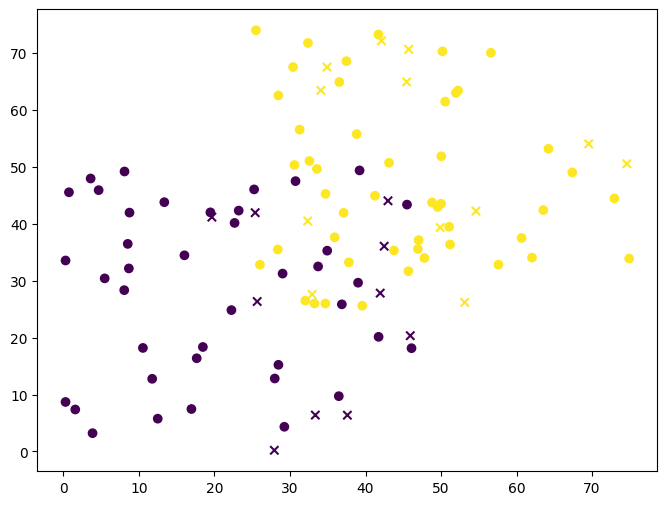

In [ ]:
import random
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
xmin1=0
xmax1=50
ymin1=0
ymax1=50
xmin2=25
xmax2=75
ymin2=25
ymax2=75
k = 3
classesCount = 2
pointsCount1= 50
pointsCount2 = 60
x=[]
y=[]
p=0.8
for i in range(pointsCount1):
    x.append([random.uniform(xmin1,xmax1),random.uniform(ymin1,ymax1)])
    y.append(1)
for i in range(pointsCount2):
    x.append([random.uniform(xmin2,xmax2),random.uniform(ymin2,ymax2)])
    y.append(2)
def train_test_split(x,y,p):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    data = list(zip(x, y))
    random.shuffle(data) 
    split_idx = int(len(data) * p)
    train, test = data[:split_idx], data[split_idx:]
    x_train, y_train = zip(*train)
    x_test, y_test = zip(*test)

    return list(x_train), list(x_test), list(y_train), list(y_test)
        

x_train, x_test, y_train, y_test = train_test_split(x,y,p)

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((np.array(p1) - np.array(p2)) ** 2))
def fit(x_train, y_train, x_test, k=3):
    y_predict = []
    
    for test_point in x_test:
        distances = [(euclidean_distance(test_point, train_point), label) for train_point, label in zip(x_train, y_train)]
        distances.sort(key=lambda x: x[0])
        k_nearest_labels = [label for _, label in distances[:k]]
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        y_predict.append(most_common)
    
    return y_predict

y_predict1=fit(x_train,y_train,x_test,k)

sovp=0
for i in range(len(y_predict1)):
    if y_predict1[i]==y_test[i]:
        sovp+=1
accuracy=sovp/len(y_predict1)
print(accuracy)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

plt.figure(figsize=(8, 6))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, marker='o')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, marker='x')
plt.show()


